<a href="https://colab.research.google.com/github/yoosoo13/yoosoo13/blob/main/%ED%98%BC%EA%B3%B5%ED%8C%8C/%ED%98%BC%EA%B3%B5%ED%8C%8C2_%EC%9B%B9%EC%8A%A4%ED%81%AC%EB%9E%98%ED%95%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 프로그램으로 웹사이트의 페이지를 옮겨 가면서 데이터를 추출하는 작업 = 웹 스크래핑 or 웹 크롤링
- requests패키지를 활용하여 웹사이트의 HTML을 가져올 수 있음

In [ ]:
# 혼공파2-API호출에서 저장했던 '20대가 가장 좋아하는 도서 목록'사용하기 위해 불러오기
# https://drive.google.com/uc?id=(파일경로)
import gdown
gdown.download('https://drive.google.com/uc?id=1-4OcgJ9F3ZVfBJGWi9Xe9GmocFDylp0M', '23s_best_book.json', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1-4OcgJ9F3ZVfBJGWi9Xe9GmocFDylp0M
To: /content/23s_best_book.json
100%|██████████| 79.5k/79.5k [00:00<00:00, 41.6MB/s]


'23s_best_book.json'

In [ ]:
import pandas as pd
books_df = pd.read_json('23s_best_book.json')
books_df.head()

,no,ranking,bookname,authors,publisher,publication_year,isbn13,addition_symbol,vol,class_no,class_nm,loan_count,bookImageURL,bookDtlUrl
0,1,1,"물고기는 존재하지 않는다 :상실, 사랑 그리고 숨어 있는 삶의 질서에 관한 이야기",룰루 밀러 지음 ;정지인 옮김,곰출판,2021,9791189327156,03400,,490.99,자연과학 > 동물학 > 동물학,494,https://image.aladin.co.kr/product/28465/73/co...,https://data4library.kr/bookV?seq=6360937
1,2,2,불편한 편의점 :김호연 장편소설,지은이: 김호연,나무옆의자,2021,9791161571188,03810,,813.7,문학 > 한국문학 > 소설,492,https://image.aladin.co.kr/product/26942/84/co...,https://data4library.kr/bookV?seq=5962217
2,3,3,지구 끝의 온실 :김초엽 장편소설,지은이: 김초엽,Giant Books(자이언트북스),2021,9791191824001,03810,,813.7,문학 > 한국문학 > 소설,466,https://image.aladin.co.kr/product/27692/63/co...,https://data4library.kr/bookV?seq=6065686
3,4,4,달러구트 꿈 백화점.이미예 장편소설,지은이: 이미예,팩토리나인,2020,9791165341909,03810,,813.7,문학 > 한국문학 > 소설,438,https://image.aladin.co.kr/product/24512/70/co...,https://data4library.kr/bookV?seq=5707051
4,5,5,우리가 빛의 속도로 갈 수 없다면 :김초엽 소설,지은이: 김초엽,허블,2019,9791190090018,03810,,813.7,문학 > 한국문학 > 소설,425,https://image.aladin.co.kr/product/19359/16/co...,https://data4library.kr/bookV?seq=5430429


In [ ]:
# books_df 데이터프레임 열이 많아서 한눈에 다 안들어와 ▶ no~isb13열까지만 선택해서 새로운 데이터프레임 만들어보기
books = books_df[['no', 'ranking', 'bookname', 'authors', 'publisher', 'publication_year', 'isbn13']]
books.head()

,no,ranking,bookname,authors,publisher,publication_year,isbn13
0,1,1,"물고기는 존재하지 않는다 :상실, 사랑 그리고 숨어 있는 삶의 질서에 관한 이야기",룰루 밀러 지음 ;정지인 옮김,곰출판,2021,9791189327156
1,2,2,불편한 편의점 :김호연 장편소설,지은이: 김호연,나무옆의자,2021,9791161571188
2,3,3,지구 끝의 온실 :김초엽 장편소설,지은이: 김초엽,Giant Books(자이언트북스),2021,9791191824001
3,4,4,달러구트 꿈 백화점.이미예 장편소설,지은이: 이미예,팩토리나인,2020,9791165341909
4,5,5,우리가 빛의 속도로 갈 수 없다면 :김초엽 소설,지은이: 김초엽,허블,2019,9791190090018


#### 데이터프레임 행과 열 선택하기 : loc메서드, 메서드지만 대괄호 사용함

In [ ]:
books_df.loc[[0,1],['bookname', 'authors']]

,bookname,authors
0,"물고기는 존재하지 않는다 :상실, 사랑 그리고 숨어 있는 삶의 질서에 관한 이야기",룰루 밀러 지음 ;정지인 옮김
1,불편한 편의점 :김호연 장편소설,지은이: 김호연


#### 여기서 잠깐!
- loc 메서드 : 인덱스와 열 이름을 사용
  - books_df.loc[[0,1],['bookname', 'authors']]
- iloc 메서드 : 인덱스의 위치를 사용
  - books_df.iloc[[0,2],[2,4]]

In [ ]:
# 리스트 대신 슬라이스 연산자(:)사용가능
books_df.loc[0:1, 'bookname':'authors']

,bookname,authors
0,"물고기는 존재하지 않는다 :상실, 사랑 그리고 숨어 있는 삶의 질서에 관한 이야기",룰루 밀러 지음 ;정지인 옮김
1,불편한 편의점 :김호연 장편소설,지은이: 김호연


In [ ]:
books_df.iloc[0:2,2:4]

,bookname,authors
0,"물고기는 존재하지 않는다 :상실, 사랑 그리고 숨어 있는 삶의 질서에 관한 이야기",룰루 밀러 지음 ;정지인 옮김
1,불편한 편의점 :김호연 장편소설,지은이: 김호연


In [ ]:
# 시작과 끝을 지정하지 않고 슬라이스 연산자(:)만 사용하면, 전체를 의미함
books = books_df.loc[:, 'no':'isbn13']
books.head()

,no,ranking,bookname,authors,publisher,publication_year,isbn13
0,1,1,"물고기는 존재하지 않는다 :상실, 사랑 그리고 숨어 있는 삶의 질서에 관한 이야기",룰루 밀러 지음 ;정지인 옮김,곰출판,2021,9791189327156
1,2,2,불편한 편의점 :김호연 장편소설,지은이: 김호연,나무옆의자,2021,9791161571188
2,3,3,지구 끝의 온실 :김초엽 장편소설,지은이: 김초엽,Giant Books(자이언트북스),2021,9791191824001
3,4,4,달러구트 꿈 백화점.이미예 장편소설,지은이: 이미예,팩토리나인,2020,9791165341909
4,5,5,우리가 빛의 속도로 갈 수 없다면 :김초엽 소설,지은이: 김초엽,허블,2019,9791190090018


In [ ]:
# loc추가 : 행 한칸씩 건너뛰면서 행을 선택
books_df.loc[::2, 'no':'isbn13'].head()

,no,ranking,bookname,authors,publisher,publication_year,isbn13
0,1,1,"물고기는 존재하지 않는다 :상실, 사랑 그리고 숨어 있는 삶의 질서에 관한 이야기",룰루 밀러 지음 ;정지인 옮김,곰출판,2021,9791189327156
2,3,3,지구 끝의 온실 :김초엽 장편소설,지은이: 김초엽,Giant Books(자이언트북스),2021,9791191824001
4,5,5,우리가 빛의 속도로 갈 수 없다면 :김초엽 소설,지은이: 김초엽,허블,2019,9791190090018
6,7,7,홍학의 자리 :정해연 장편소설,지은이: 정해연,문학동네,2021,9788954681155
8,9,9,"시선으로부터, :정세랑 장편소설",지은이: 정세랑,문학동네,2020,9788954672214


In [ ]:
# iloc추가
# iloc는 정수만 들어가야한다.
# 참고자료 : https://bigdaheta.tistory.com/42
books_df.iloc[::2].head()

,no,ranking,bookname,authors,publisher,publication_year,isbn13,addition_symbol,vol,class_no,class_nm,loan_count,bookImageURL,bookDtlUrl
0,1,1,"물고기는 존재하지 않는다 :상실, 사랑 그리고 숨어 있는 삶의 질서에 관한 이야기",룰루 밀러 지음 ;정지인 옮김,곰출판,2021,9791189327156,03400,,490.99,자연과학 > 동물학 > 동물학,494,https://image.aladin.co.kr/product/28465/73/co...,https://data4library.kr/bookV?seq=6360937
2,3,3,지구 끝의 온실 :김초엽 장편소설,지은이: 김초엽,Giant Books(자이언트북스),2021,9791191824001,03810,,813.7,문학 > 한국문학 > 소설,466,https://image.aladin.co.kr/product/27692/63/co...,https://data4library.kr/bookV?seq=6065686
4,5,5,우리가 빛의 속도로 갈 수 없다면 :김초엽 소설,지은이: 김초엽,허블,2019,9791190090018,03810,,813.7,문학 > 한국문학 > 소설,425,https://image.aladin.co.kr/product/19359/16/co...,https://data4library.kr/bookV?seq=5430429
6,7,7,홍학의 자리 :정해연 장편소설,지은이: 정해연,문학동네,2021,9788954681155,03810,,813.7,문학 > 한국문학 > 소설,383,https://image.aladin.co.kr/product/27587/94/co...,https://data4library.kr/bookV?seq=6050062
8,9,9,"시선으로부터, :정세랑 장편소설",지은이: 정세랑,문학동네,2020,9788954672214,03810,,813.7,문학 > 한국문학 > 소설,361,https://image.aladin.co.kr/product/24131/37/co...,https://data4library.kr/bookV?seq=5674475


### 검색 결과 페이지 HTML 가져오기 : requests.get()함수 사용

In [ ]:
import requests
isbn = 9791189327156 # bookname =	물고기는 존재하지 않는다 :상실, 사랑 그리고 숨어 있는 삶의 질서에 관한 이야기
url = 'http://www.yes24.com/Product/Search?domain=BOOK&query={}'
r = requests.get(url.format(isbn))

In [ ]:
print(r.text)






	<!DOCTYPE html >
	<html lang="ko">

<head>
	<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
	<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
	<meta http-equiv="Accept-CH" content="dpr, width, viewport-width, rtt, downlink, ect, UA, UA-Platform, UA-Arch, UA-Model, UA-Mobile, UA-Full-Version" />
	<meta http-equiv="Accept-CH-Lifetime" content="86400" />
	<meta name="referrer" content="unsafe-url" />
	<meta name="viewport" content="width=1170" />

	<title> 9791189327156 - 예스24</title> 

	<meta name="title" content="예스24" />
	<meta name="description" content="YOUR EVERY STORY 문화 콘텐츠 플랫폼, 예스24" />
	<meta name="keywords" content="인터넷 서점, 온라인 쇼핑, 상품 추천, 쇼핑몰, 상품 검색, 도서 정보, 국내도서, 외국도서, 전자책, eBook, 이북, 크레마, 공연, 콘서트, 뮤지컬, 음반, 예매, DVD, 블루레이, 예스24, YES24, 교보문고, 알라딘" />


	<link title="YES24" rel="search" type="application/opensearchdescription+xml" href="//www.yes24.com/OpensearchDescription.xml">

	<script type="text/javascript" src="https://image.yes24.com/sysima

### HTML에서 데이터 추출하기 : 뷰티플수프

In [ ]:
# 크롬 개발자 도구로 HTML 태그 찾기
# 뷰티플수프 패키지에서 BeautifulSoup클래스 불러오기
from bs4 import BeautifulSoup

In [ ]:
# 클래스 객체 생성
# 첫 번째 매개변수 : 파싱_parsing할 HTML문서
# 두 번째 매개변수 : 파싱에 사용할 파서_parser
soup = BeautifulSoup(r.text, 'html.parser')

In [ ]:
# 태그 위치 찾기: find()메서드
# 첫 번째 매개변수에는 찾을 태그 이름 지정, attrs 매개변수에는 찾으려는 태그의 속성을 딕셔너리로 지정
# (예) soup.find('div',attrs={'id' : 'search'})

# prd_link : 링크가 포함되어 있는 뷰티플수프의 Tag 클래스 객체
prd_link = soup.find('a', attrs={'class' : 'gd_name'})

In [ ]:
# 태그 안에 포함된 HTML출력
print(prd_link)

<a class="gd_name" href="/Product/Goods/105526047" onclick="setSCode('101_005_003_001');setGoodsClickExtraCodeHub('032', '9791189327156', '105526047', '0');">물고기는 존재하지 않는다</a>


In [ ]:
print(prd_link['href'])

/Product/Goods/105526047


In [ ]:
# 도서 상세 페이지 HTML 가져오기
# 검색 결과 페이지를 가져왔을 때처럼 상세 페이지 주소를 만들어 requests.get()함수로 호출

# 'bookname =	물고기는 존재하지 않는다 :상실, 사랑 그리고 숨어 있는 삶의 질서에 관한 이야기'의 상세 페이지 가져오기
url = 'http://www.yes24.com'+prd_link['href']
r = requests.get(url)








	<!DOCTYPE html >
	<html lang="ko">

<head><link rel="canonical" href="https://www.yes24.com/Product/Goods/105526047"> <link rel="alternate" media="only screen and(max-width: 640px)"  href="https://m.yes24.com/Goods/Detail/105526047">
	<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
	<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
	<meta http-equiv="Accept-CH" content="dpr, width, viewport-width, rtt, downlink, ect, UA, UA-Platform, UA-Arch, UA-Model, UA-Mobile, UA-Full-Version" />
	<meta http-equiv="Accept-CH-Lifetime" content="86400" />
	<meta name="referrer" content="unsafe-url" />
	<meta name="viewport" content="width=1170" />

	<title> 물고기는 존재하지 않는다 - YES24 </title> 

	
<meta name="title" content="물고기는 존재하지 않는다 - YES24"/>
<meta name="author" content="룰루 밀러|정지인" />
	
<meta name="description" content="‘방송계의 퓰리처상’ 피버디상 수상자 룰루 밀러의사랑과 혼돈, 과학적 집착에 관한 경이롭고도 충격적인 데뷔작!‘방송계의 퓰리처상’으로 불리는 피버디상(Peabody Awards)을 수상한 과학 전문기자 룰루 밀러의 경이로운 논픽션 《물고기는 존재하지 않는다》는...
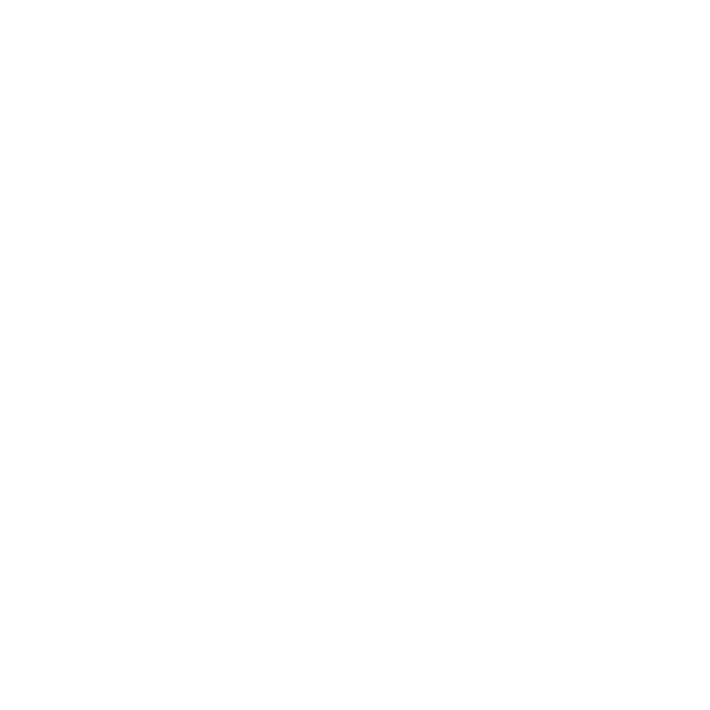
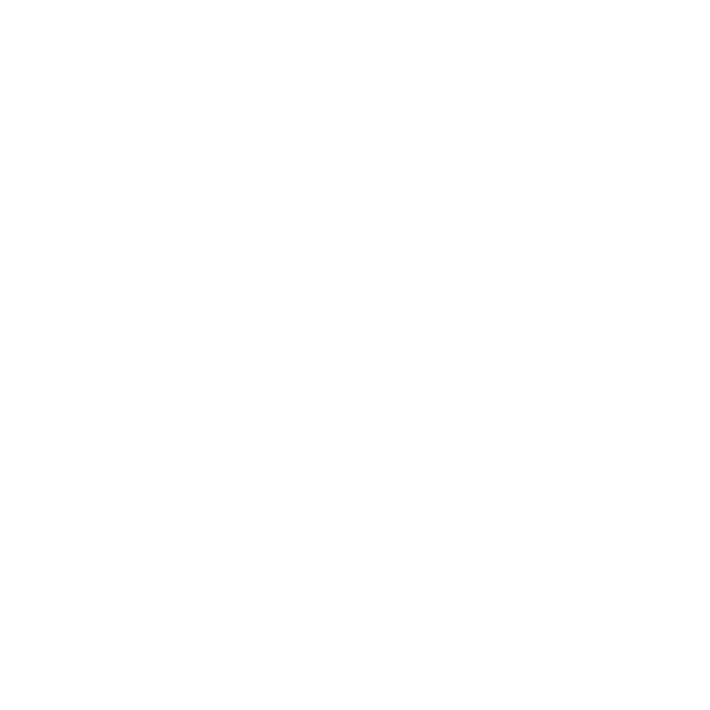
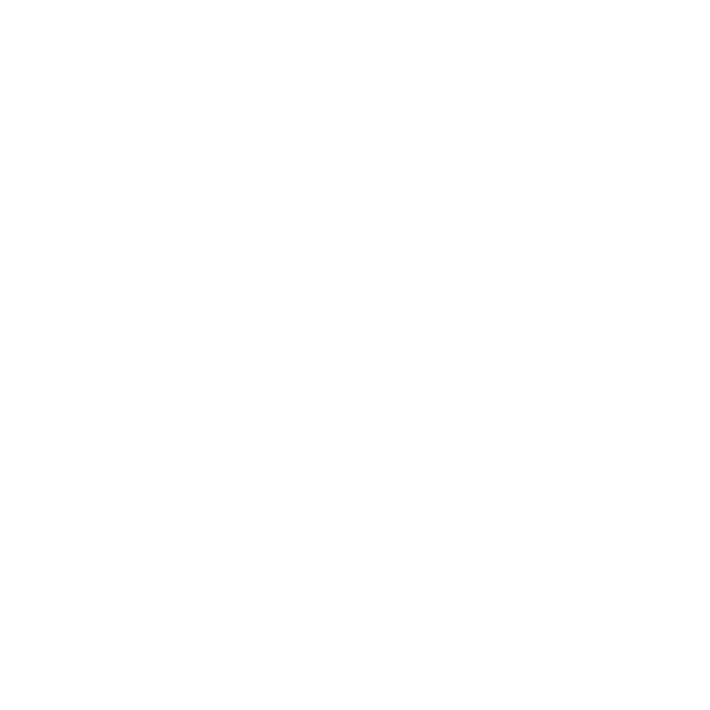
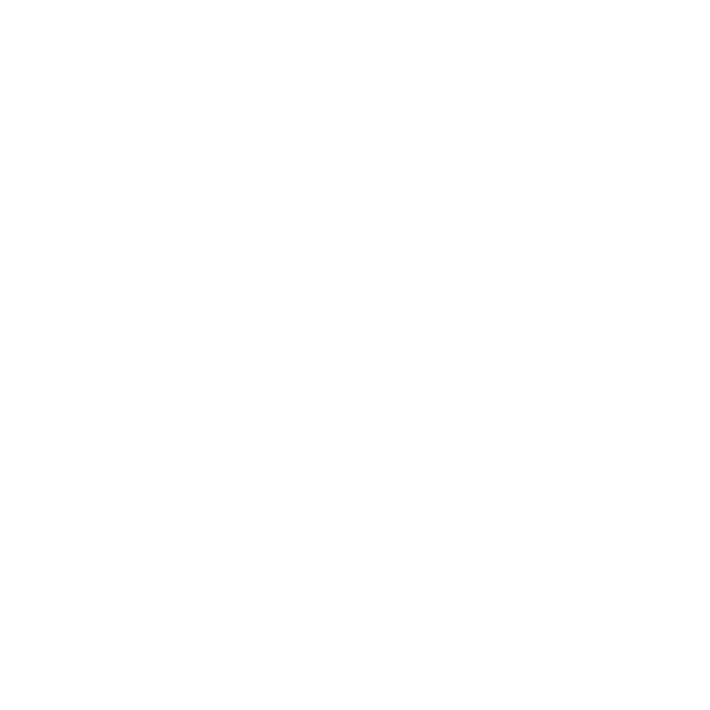
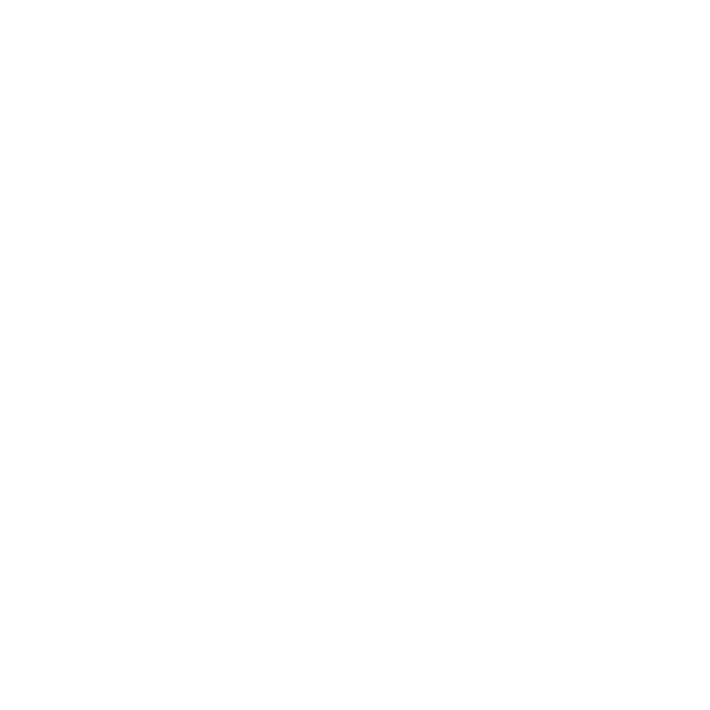
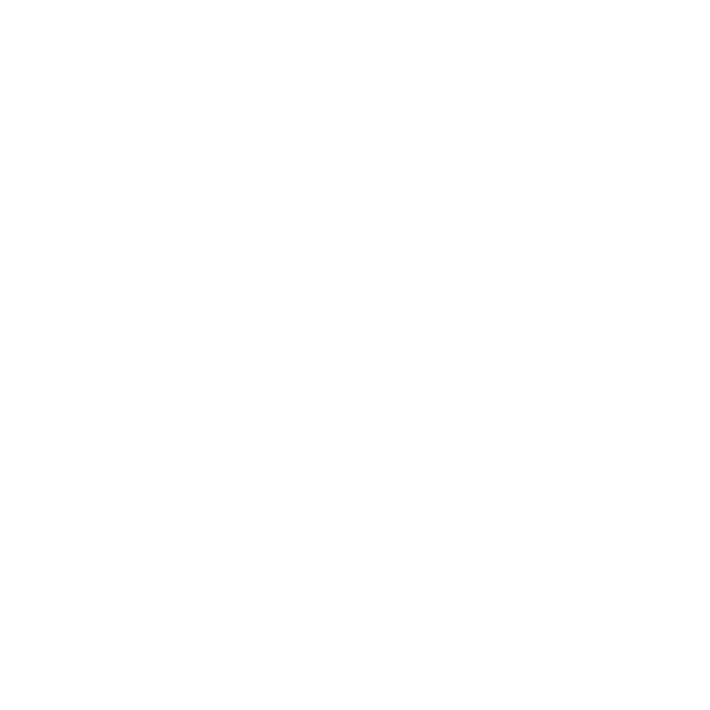
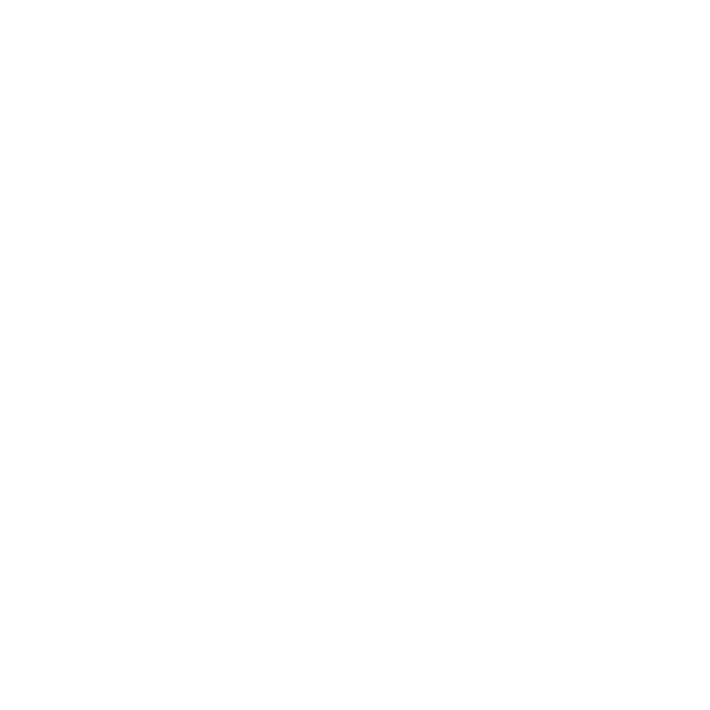
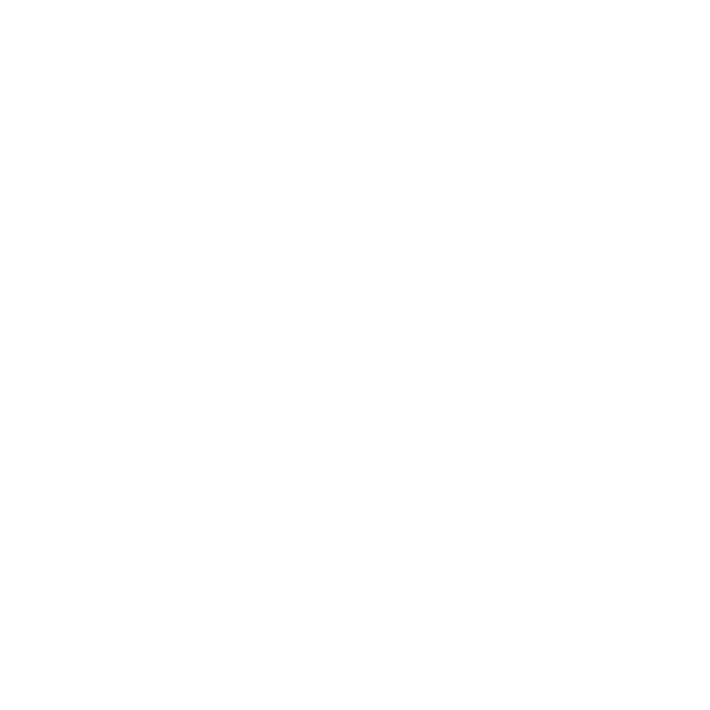
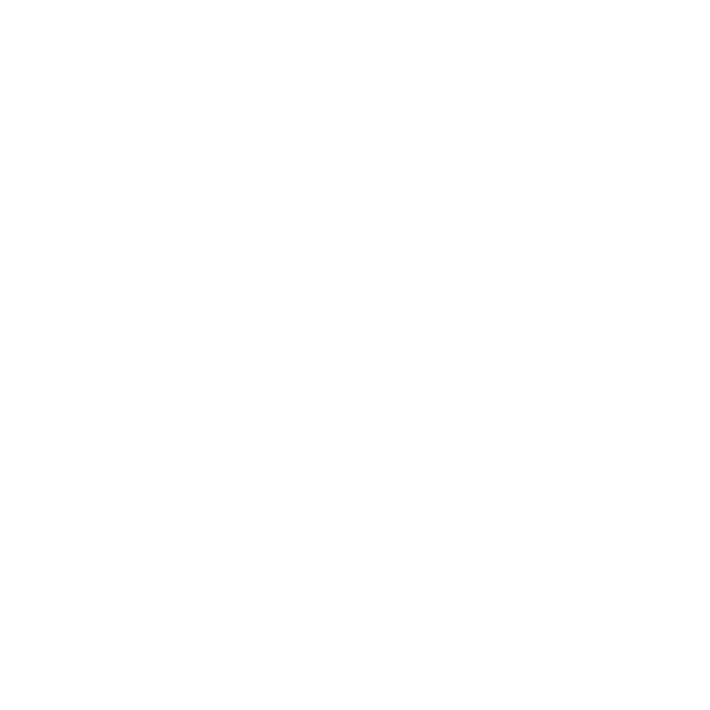
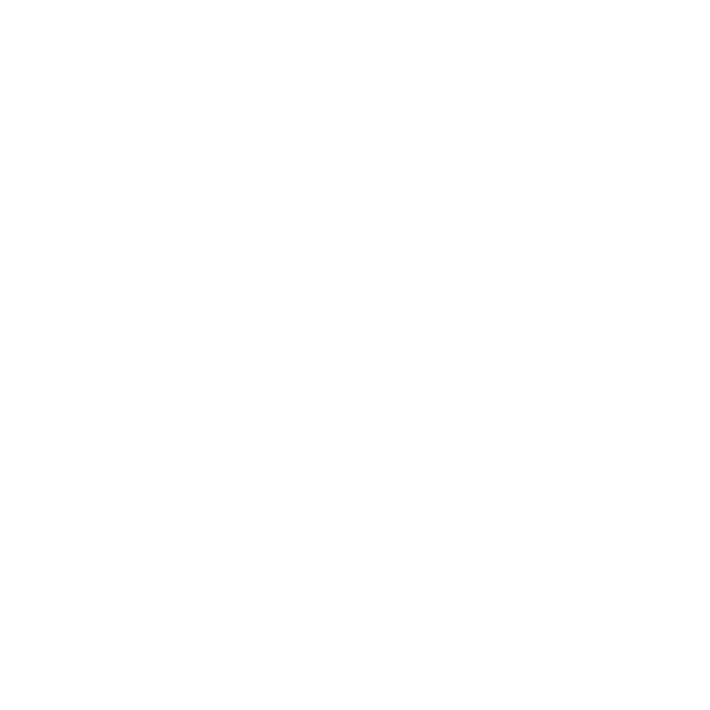

In [ ]:
print(r.text)

### 도서 링크를 찾았을 때 처럼 / 크롬 브라우저의 개발자 도구를 열어 / "쪽수"가 담긴 HTML의 위치 찾기

- "쪽수"는 품목정보를 포함하고 있는 div id = "inforset_specific" class = "gd_infoSet infoSet_noLine" 태그 안에 있음

In [ ]:
# 뷰티플수프 객채 생성 → find()메서드로 품목정보 <div> 태그 찾아서 출력하기
soup = BeautifulSoup(r.text, 'html.parser')
prd_detail = soup.find('div', attrs = {'id' : 'infoset_specific'})
print(prd_detail)

<div class="gd_infoSet infoSet_noLine" id="infoset_specific">
<div class="tm_infoSet">
<h4 class="tit_txt">품목정보</h4>
</div>
<div class="infoSetCont_wrap">
<div class="yesTb">
<table class="tb_nor tb_vertical" summary="품목정보 국내도서, 외국도서 " width="100%">
<caption>품목정보</caption>
<colgroup>
<col width="170"/>
<col width="*"/>
</colgroup>
<tbody class="b_size">
<tr>
<th class="txt" scope="row">발행일</th>
<td class="txt lastCol">2021년 12월 17일</td>
</tr>
<tr>
<th class="txt" scope="row">쪽수, 무게, 크기</th>
<td class="txt lastCol">300쪽 | 480g | 135*210*20mm</td>
</tr>
<tr>
<th class="txt" scope="row">ISBN13</th>
<td class="txt lastCol">9791189327156</td>
</tr>
<tr>
<th class="txt" scope="row">ISBN10</th>
<td class="txt lastCol">1189327155</td>
</tr>
</tbody>
</table>
</div>
</div>
<script type="text/javascript">
        if ($("#infoset_specific table tbody tr").length == 0) {
            $("#infoset_specific").remove();
        }
    </script>
</div>


In [ ]:
# <div>태그 대신 그 아래 <table>태그로 찾기
prd_detail = soup.find('table', attrs={'class':'tb_nor tb_vertical'})

In [ ]:
# 테이블 태그를 리스트로 가져오기 : find_all()메서드 사용
# <tr>태그 찾기
prd_tr_list = prd_detail.find_all('tr')
print(prd_tr_list)

[<tr>
<th class="txt" scope="row">발행일</th>
<td class="txt lastCol">2021년 12월 17일</td>
</tr>, <tr>
<th class="txt" scope="row">쪽수, 무게, 크기</th>
<td class="txt lastCol">300쪽 | 480g | 135*210*20mm</td>
</tr>, <tr>
<th class="txt" scope="row">ISBN13</th>
<td class="txt lastCol">9791189327156</td>
</tr>, <tr>
<th class="txt" scope="row">ISBN10</th>
<td class="txt lastCol">1189327155</td>
</tr>]


In [ ]:
# 태그 안의 텍스트 가져오기 :get_text()메서드 사용
# <tr>태그를 리스트로 추출 → for문 사용, prd_tr_list를 순회하면서 <th>태그 안의 텍스트가 '쪽수, 무게, 크기'에 해당하는지 검사 (← 원하는 행을 찾으면 <td> 태그 안에 담긴 텍스트를 page_td변수에 저장)
for tr in prd_tr_list:
  if tr.find('th').get_text() == '쪽수, 무게, 크기':
    page_td = tr.find('td').get_text()
    break

In [ ]:
print(page_td)

300쪽 | 480g | 135*210*20mm


In [ ]:
# split()메서드를 호출하면, 공백을 기준으로 문자열을 나누어 → 리스트로 반환
print(page_td.split()[0])

300쪽


# [선택미션]
## 전체 도서의 쪽수 구하기
- PANDAS DataFrame은 한 행씩 순차적으로 처리하는데 최적화되어 있지 않음
  - DataFrame을 for문으로 반복하는 것은 아주 비효율적
  - DataFrame은 각 행 또는 각 열에 원하는 함수를 자동으로 적용해주는 여러 가지 방법을 제공

In [ ]:
def get_page_cnt(isbn):
  # 1. 온라인 서점(yes24)의 검색 결과 페이지 URL 생성
  url = 'http://www.yes24.com/Product/Search?domain=BOOK&query={}'

  # 2. requests.get()함수로 검색 결과 페이지의 HTML을 가져오기
  r = requests.get(url.format(isbn))

  # 3. 뷰티플수프로 HTML을 파싱
  soup = BeautifulSoup(r.text, 'html.parser')

  # 4. 뷰티플수프의 find()메서드로 <a>태그를 찾아 상세 페이지 URL 추출
  prd_info = soup.find('a', attrs={'class' : 'gd_name'})

  # 5. requests.get()함수로 다시 도서 상세 페이지의 HTML 가져오기 & 6. 뷰티플수프로 HTML 파싱
  url = 'http://www.yes24.com'+prd_info['href']
  r = requests.get(url)
  soup = BeautifulSoup(r.text, 'html.parser')

  # 7. 뷰티플수프의 find()메서드로 '품목정보' <div> 태그 찾기
  prd_detail = soup.find('div', attrs={'id' : 'infoset_specific'})

  # 8. 뷰티플수프의 findall()메서드로 '쪽수'가 들어있는 <tr> 태그 찾기
  prd_tr_list = prd_detail.find_all('tr')

  # 9. 쪽수가 들어 있는 <th>를 찾아 <td>에 담긴 값을 반환
  for tr in prd_tr_list :
    if tr.find('th').get_text() == '쪽수, 무게, 크기':
      return tr.find('td').get_text().split()[0]
  return ''

In [ ]:
# 첫 번째 도서의 ISBN넣어서 위 함수 확인하기
get_page_cnt(9791189327156)

'300쪽'

#### 데이터프레임 행 혹은 열에 함수 적용하기 : apply()메서드

In [ ]:
# book_df 데이터프레임에는 모두 200개의 도서가 들어 있음. 이 중 가장 인기 있는 10권 확인 : head(10)사용
top10_books = books.head(10)
top10_books

,no,ranking,bookname,authors,publisher,publication_year,isbn13
0,1,1,"물고기는 존재하지 않는다 :상실, 사랑 그리고 숨어 있는 삶의 질서에 관한 이야기",룰루 밀러 지음 ;정지인 옮김,곰출판,2021,9791189327156
1,2,2,불편한 편의점 :김호연 장편소설,지은이: 김호연,나무옆의자,2021,9791161571188
2,3,3,지구 끝의 온실 :김초엽 장편소설,지은이: 김초엽,Giant Books(자이언트북스),2021,9791191824001
3,4,4,달러구트 꿈 백화점.이미예 장편소설,지은이: 이미예,팩토리나인,2020,9791165341909
4,5,5,우리가 빛의 속도로 갈 수 없다면 :김초엽 소설,지은이: 김초엽,허블,2019,9791190090018
5,6,6,천 개의 파랑 :천선란 장편소설,지은이: 천선란,허블,2020,9791190090261
6,7,7,홍학의 자리 :정해연 장편소설,지은이: 정해연,문학동네,2021,9788954681155
7,8,8,구의 증명 :최진영 소설,지은이: 최진영,은행나무,2015,9788956608556
8,9,9,"시선으로부터, :정세랑 장편소설",지은이: 정세랑,문학동네,2020,9788954672214
9,10,10,"칵테일, 러브, 좀비",지은이: 조예은,안전가옥,2020,9791190174756


In [ ]:
# 인기 10위 도서의 쪽수를 확인하기 전에, 데이터프레임의 한 행을 받아 get_page_cn()함수를 사용해 쪽수를 구하는 함수 생성 (단순히 'isbn13'열의 값을 get_page_cnt()함수로 전달하는 역할만 수행)
def get_page_cnt2(row):
  isbn = row['isbn13']
  return get_page_cnt(isbn)

In [ ]:
# apply()메서드 사용
page_count = top10_books.apply(get_page_cnt2, axis=1)  # apply()메서드에 axis매개변수에 1을 지정하면 행에, 기본값 0을 사용하면 열에 적용함
print(page_count)

0    300쪽
1    268쪽
2    392쪽
3    300쪽
4    330쪽
5    376쪽
6    336쪽
7    177쪽
8    340쪽
9    165쪽
dtype: object


In [ ]:
# 추가-함수 2번 만들지 않고 더 간단히 작성하기 람다(lambda)함수 사용
# 람다(lambda) : some_df.apply(lambd colum_매개변수 : some_func(column)_리턴할 값, axis=0 or 1_적용할 열 또는 행 지정)
page_count = top10_books.apply(lambda row : get_page_cnt(row['isbn13']), axis=1)

### 데이터프레임과 시리즈 합치기 : merge()함수
- 판다스에서 두 데이터프레임을 합침 & 데이터프레임과 시리즈를 합칠 때, merge()함수 사용
- 두 객체의 인덱스를 기준으로 합칠 경우, left_index와 right_index매개변수를 True로 지정

In [ ]:
page_count.name = 'page_count'
print(page_count)

0    300쪽
1    268쪽
2    392쪽
3    300쪽
4    330쪽
5    376쪽
6    336쪽
7    177쪽
8    340쪽
9    165쪽
Name: page_count, dtype: object


In [ ]:
top10_with_page_count = pd.merge(top10_books, page_count, left_index=True, right_index=True)
top10_with_page_count

,no,ranking,bookname,authors,publisher,publication_year,isbn13,page_count
0,1,1,"물고기는 존재하지 않는다 :상실, 사랑 그리고 숨어 있는 삶의 질서에 관한 이야기",룰루 밀러 지음 ;정지인 옮김,곰출판,2021,9791189327156,300쪽
1,2,2,불편한 편의점 :김호연 장편소설,지은이: 김호연,나무옆의자,2021,9791161571188,268쪽
2,3,3,지구 끝의 온실 :김초엽 장편소설,지은이: 김초엽,Giant Books(자이언트북스),2021,9791191824001,392쪽
3,4,4,달러구트 꿈 백화점.이미예 장편소설,지은이: 이미예,팩토리나인,2020,9791165341909,300쪽
4,5,5,우리가 빛의 속도로 갈 수 없다면 :김초엽 소설,지은이: 김초엽,허블,2019,9791190090018,330쪽
5,6,6,천 개의 파랑 :천선란 장편소설,지은이: 천선란,허블,2020,9791190090261,376쪽
6,7,7,홍학의 자리 :정해연 장편소설,지은이: 정해연,문학동네,2021,9788954681155,336쪽
7,8,8,구의 증명 :최진영 소설,지은이: 최진영,은행나무,2015,9788956608556,177쪽
8,9,9,"시선으로부터, :정세랑 장편소설",지은이: 정세랑,문학동네,2020,9788954672214,340쪽
9,10,10,"칵테일, 러브, 좀비",지은이: 조예은,안전가옥,2020,9791190174756,165쪽
